## O Dataset Water Metrics 

* Importa bibliotecas necessárias

In [56]:
import pandas as pd
import numpy as np 
import sklearn
import random

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

* Define o seed para o gerador de números aleatórios

In [57]:
random.seed(42)

* Importa o dataset

In [58]:
original_dataset = pd.read_csv('water_metrics_embrapa.csv', delimiter=',')

* Exibe as 5 primeiras amostras do dataset

In [59]:
original_dataset.head()

,Data Coleta,Amostra,Produtor,Viveiro,T(ºC),pH,ORP (mv),Condutividade (mS/cm),Turbidez (ntu),OD (mg/L),OD %,TDS,Salinidade %,Cidade,Estado
0,03-05-2016,B1E,B,Viveiro 1,19.10,7.44,355.0,0.05,18.3,7.90,87.8,0.03,0.0,MOGI MIRIM,SÃO PAULO
1,03-05-2016,B1M,B,Viveiro 1,19.37,7.42,355.0,0.05,19.5,7.75,86.6,0.03,0.0,MOGI MIRIM,SÃO PAULO
2,03-05-2016,B1S,B,Viveiro 1,19.98,7.43,351.0,0.05,13.1,6.52,73.7,0.03,0.0,MOGI MIRIM,SÃO PAULO
3,03-05-2016,B2E,B,Viveiro 2,18.97,7.20,325.0,0.05,38.0,7.56,83.8,0.03,0.0,MOGI MIRIM,SÃO PAULO
4,03-05-2016,B2M,B,Viveiro 2,19.38,7.35,342.0,0.05,32.5,7.33,81.9,0.03,0.0,MOGI MIRIM,SÃO PAULO


* Informa o tipo de variável de cada coluna do dataset

In [60]:
original_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Data Coleta            169 non-null    object 
 1   Amostra                169 non-null    object 
 2   Produtor               169 non-null    object 
 3   Viveiro                169 non-null    object 
 4   T(ºC)                  169 non-null    float64
 5   pH                     169 non-null    float64
 6   ORP (mv)               169 non-null    float64
 7   Condutividade (mS/cm)  169 non-null    float64
 8   Turbidez (ntu)         169 non-null    float64
 9   OD (mg/L)              169 non-null    float64
 10  OD %                   169 non-null    float64
 11  TDS                    169 non-null    float64
 12  Salinidade %           169 non-null    float64
 13  Cidade                 169 non-null    object 
 14  Estado                 169 non-null    object 
dtypes: flo

* Obtem medidas das features numéricas

In [61]:
original_dataset.describe(include='all')

,Data Coleta,Amostra,Produtor,Viveiro,T(ºC),pH,ORP (mv),Condutividade (mS/cm),Turbidez (ntu),OD (mg/L),OD %,TDS,Salinidade %,Cidade,Estado
count,169,169,169,169,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169,169
unique,13,24,4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1
top,03-05-2016,C2M,C,Viveiro 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ITAPIRA,SÃO PAULO
freq,24,8,43,85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85,169
mean,NaN,NaN,NaN,NaN,26.805858,6.985976,312.177515,0.060947,46.542012,5.685503,71.662130,0.039467,0.002485,NaN,NaN
std,NaN,NaN,NaN,NaN,3.410101,0.713310,47.628690,0.043497,34.457705,1.683798,20.457499,0.029078,0.004334,NaN,NaN
min,NaN,NaN,NaN,NaN,18.970000,5.710000,210.000000,0.010000,6.300000,2.410000,31.900000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,25.630000,6.380000,276.000000,0.020000,17.400000,4.330000,54.500000,0.010000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,27.350000,7.050000,312.000000,0.050000,40.700000,5.790000,74.800000,0.030000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,28.510000,7.420000,348.000000,0.100000,61.600000,7.240000,88.300000,0.070000,0.000000,NaN,NaN


* Conta os valores faltantes em cada coluna

In [62]:
print(original_dataset.isna().sum())

Data Coleta              0
Amostra                  0
Produtor                 0
Viveiro                  0
T(ºC)                    0
pH                       0
ORP (mv)                 0
Condutividade (mS/cm)    0
Turbidez (ntu)           0
OD (mg/L)                0
OD %                     0
TDS                      0
Salinidade %             0
Cidade                   0
Estado                   0
dtype: int64


* Exibe as dimensões do dataset

In [63]:
original_dataset.shape

(169, 15)

* Remove colunas que não serão utlizadas

In [64]:
dataset = original_dataset.drop(['Data Coleta', 'Amostra', 'Produtor', 'Viveiro', 'Estado', 'Cidade'], axis=1)

* Exibe as 5 primeiras amostras do dataset após a remoção das colunas que não serão utlizadas

In [65]:
dataset.head()

,T(ºC),pH,ORP (mv),Condutividade (mS/cm),Turbidez (ntu),OD (mg/L),OD %,TDS,Salinidade %
0,19.10,7.44,355.0,0.05,18.3,7.90,87.8,0.03,0.0
1,19.37,7.42,355.0,0.05,19.5,7.75,86.6,0.03,0.0
2,19.98,7.43,351.0,0.05,13.1,6.52,73.7,0.03,0.0
3,18.97,7.20,325.0,0.05,38.0,7.56,83.8,0.03,0.0
4,19.38,7.35,342.0,0.05,32.5,7.33,81.9,0.03,0.0


* Separa features e labels
    * pH é a coluna alvo

In [66]:
features = dataset.drop(['pH'], axis=1)
features = features.to_numpy()

In [67]:
labels = dataset['pH']
labels = labels.to_numpy()

* Divide o dataset em treino e teste na proporção 75% / 25%

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=42)

In [69]:
X_train.shape

(126, 8)

In [70]:
X_test.shape

(43, 8)

## Normalização dos dados

Utiliza a normalização com valores centrados na média e desvio padrão igual a 1

In [71]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [72]:
# Média de cada coluna do conjunto de treino após a normalização
np.mean(X_train, axis=0)

array([-2.47333018e-15,  2.33499287e-16,  2.13585763e-15, -3.57297965e-16,
       -1.17718886e-15,  3.48927236e-16,  1.86446978e-15, -2.99583991e-16])

In [73]:
# Desvio padrão de cada coluna do conjunto de treino após a normalização
np.std(X_train, axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1.])

## Modelos de Machine Learning

* Dicionários para armazenar a performace dos modelos

In [74]:
MAE_dict = dict()
MAPE_dict = dict()
RMSE_dict = dict()

## MLP Regressor

* Importa o modelo

In [75]:
from sklearn.neural_network import MLPRegressor

* Utiliza o grid search para encontrar os melhores parâmetros para o modelo
* A métrica para definir os melhores parâmetros é a MAPE (Mean Absolute Percentage Error)
* Utiliza k-fold cross validation com k=3

In [76]:
mlp = MLPRegressor()
parameters = {'hidden_layer_sizes': [8, 10, 15, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80, 90, 100], 'solver': ['lbfgs', 'sgd', 'adam'], 'random_state': [42], 'max_iter':[10000]}
mlp_regressor = GridSearchCV(mlp, parameters, scoring = 'neg_mean_absolute_percentage_error', cv = 3)
mlp_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=MLPRegressor(),
             param_grid={'hidden_layer_sizes': [8, 10, 15, 20, 25, 30, 35, 40,
                                                45, 50, 60, 70, 80, 90, 100],
                         'max_iter': [10000], 'random_state': [42],
                         'solver': ['lbfgs', 'sgd', 'adam']},
             scoring='neg_mean_absolute_percentage_error')

* Exibe os melhores parâmetros

In [77]:
print(mlp_regressor.best_params_)
print(mlp_regressor.best_score_)

{'hidden_layer_sizes': 10, 'max_iter': 10000, 'random_state': 42, 'solver': 'lbfgs'}
-0.03189832051674752


* Utliza o modelo já treinado para prever os valores de pH no conjunto de teste

In [78]:
predict = mlp_regressor.predict(X_test)

* Calcula e exibe as principais métricas em relação aos valores previstos no conjunto de teste

In [79]:
MAE = mean_absolute_error(y_test, predict)
MAPE = mean_absolute_percentage_error(y_test, predict)
MSE = mean_squared_error(y_test, predict, squared=False)
RMSE = mean_squared_error(y_test, predict)

print(f'MAE: {MAE}')
print(f'MAPE: {MAPE}')
print(f'MSE: {MSE}')
print(f'RMSE: {RMSE}')

MAE_dict['MLPRegressor'] = MAE
MAPE_dict['MLPRegressor'] = MAPE
RMSE_dict['MLPRegressor'] = RMSE

MAE: 0.20191903590938926
MAPE: 0.028745637269660503
MSE: 0.27881272290564507
RMSE: 0.07773653445406002


## SVR (Support Vector Regression)

In [80]:
from sklearn.svm import SVR

In [81]:
support_vector = SVR()
parameters = {'C': [1.0,2.0,3.0,4.0,5.0,10.0,20.0,30.0,40.0,50.0,100.0], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
support_vector_regressor = GridSearchCV(support_vector, parameters, scoring = 'neg_mean_absolute_percentage_error', cv = 3)
support_vector_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVR(),
             param_grid={'C': [1.0, 2.0, 3.0, 4.0, 5.0, 10.0, 20.0, 30.0, 40.0,
                               50.0, 100.0],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='neg_mean_absolute_percentage_error')

In [82]:
print(support_vector_regressor.best_params_)
print(support_vector_regressor.best_score_)

{'C': 3.0, 'kernel': 'rbf'}
-0.02882310384538937


In [83]:
predict = support_vector_regressor.predict(X_test)

In [84]:
MAE = mean_absolute_error(y_test, predict)
MAPE = mean_absolute_percentage_error(y_test, predict)
MSE = mean_squared_error(y_test, predict, squared=False)
RMSE = mean_squared_error(y_test, predict)

print(f'MAE: {MAE}')
print(f'MAPE: {MAPE}')
print(f'MSE: {MSE}')
print(f'RMSE: {RMSE}')

MAE_dict['SVR'] = MAE
MAPE_dict['SVR'] = MAPE
RMSE_dict['SVR'] = RMSE

MAE: 0.20678650088452666
MAPE: 0.029490535666033706
MSE: 0.28182201183891314
RMSE: 0.07942364635693251


## Decisionn Tree Regressor

In [85]:
from sklearn.tree import DecisionTreeRegressor

In [86]:
decision_tree = DecisionTreeRegressor()
parameters = {'criterion': ['squared_error', 'absolute_error', 'poisson'], 'random_state':[42]}
decision_tree_regressor = GridSearchCV(decision_tree, parameters, scoring = 'neg_mean_absolute_percentage_error', cv = 3)
decision_tree_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'random_state': [42]},
             scoring='neg_mean_absolute_percentage_error')

In [87]:
print(decision_tree_regressor.best_params_)
print(decision_tree_regressor.best_score_)

{'criterion': 'absolute_error', 'random_state': 42}
-0.036987357256841547


In [88]:
predict = decision_tree_regressor.predict(X_test)

In [89]:
MAE = mean_absolute_error(y_test, predict)
MAPE = mean_absolute_percentage_error(y_test, predict)
MSE = mean_squared_error(y_test, predict, squared=False)
RMSE = mean_squared_error(y_test, predict)

print(f'MAE: {MAE}')
print(f'MAPE: {MAPE}')
print(f'MSE: {MSE}')
print(f'RMSE: {RMSE}')

MAE_dict['DecisionTreeRegressor'] = MAE
MAPE_dict['DecisionTreeRegressor'] = MAPE
RMSE_dict['DecisionTreeRegressor'] = RMSE

MAE: 0.20046511627906982
MAPE: 0.028481238653962335
MSE: 0.2744042172026601
RMSE: 0.07529767441860467


## RF Regression

In [90]:
from sklearn.ensemble import RandomForestRegressor

In [91]:
random_forest = RandomForestRegressor()
parameters = {'n_estimators': [1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100], 'random_state':[42], 'criterion': ['squared_error', 'absolute_error', 'poisson']}
random_forest_regressor = GridSearchCV(random_forest, parameters, scoring = 'neg_mean_absolute_percentage_error', cv = 3)
random_forest_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'n_estimators': [1, 5, 10, 20, 30, 35, 40, 45, 50, 55,
                                          100],
                         'random_state': [42]},
             scoring='neg_mean_absolute_percentage_error')

In [92]:
print(random_forest_regressor.best_params_)
print(random_forest_regressor.best_score_)

{'criterion': 'poisson', 'n_estimators': 10, 'random_state': 42}
-0.029213141627099676


In [93]:
rf_predict = random_forest_regressor.predict(X_test)

In [94]:
MAE = mean_absolute_error(y_test, rf_predict)
MAPE = mean_absolute_percentage_error(y_test, rf_predict)
MSE = mean_squared_error(y_test, rf_predict, squared=False)
RMSE = mean_squared_error(y_test, rf_predict)

print(f'MAE: {MAE}')
print(f'MAPE: {MAPE}')
print(f'MSE: {MSE}')
print(f'RMSE: {RMSE}')

MAE_dict['RandomForestRegressor'] = MAE
MAPE_dict['RandomForestRegressor'] = MAPE
RMSE_dict['RandomForestRegressor'] = RMSE

MAE: 0.17211627906976726
MAPE: 0.024454393391468605
MSE: 0.24125847376370144
RMSE: 0.05820565116279061


## RESULTADOS
* Avaliando as métricas de MAE, MAPE e RMSE

In [95]:
# Modelos em ordem crescente em relação ao valor de MAE
for i in sorted(MAE_dict, key = MAE_dict.get):
    print(f'{i}: {MAE_dict[i]}')

RandomForestRegressor: 0.17211627906976726
DecisionTreeRegressor: 0.20046511627906982
MLPRegressor: 0.20191903590938926
SVR: 0.20678650088452666


In [96]:
# Modelos em ordem crescente em relação ao valor de MAPE
for i in sorted(MAPE_dict, key = MAPE_dict.get):
    print(f'{i}: {MAPE_dict[i]}')

RandomForestRegressor: 0.024454393391468605
DecisionTreeRegressor: 0.028481238653962335
MLPRegressor: 0.028745637269660503
SVR: 0.029490535666033706


In [97]:
# Modelos em ordem crescente em relação ao valor de RMSE
for i in sorted(RMSE_dict, key = RMSE_dict.get):
    print(f'{i}: {RMSE_dict[i]}')

RandomForestRegressor: 0.05820565116279061
DecisionTreeRegressor: 0.07529767441860467
MLPRegressor: 0.07773653445406002
SVR: 0.07942364635693251


* Cria um dataframe para armazenar os resultados obtidos

In [98]:
columns = ['Modelo', 'MAE', 'MAPE', 'RMSE']
results = pd.DataFrame(columns=columns)

In [99]:
modelos = ['MLPRegressor', 'SVR', 'DecisionTreeRegressor', 'RandomForestRegressor']
results['Modelo'] = modelos

* Armazena as métricas obtidas em listas

In [100]:
MAE_list = []
MAPE_list = []
RMSE_list = []

for i in range(0,len(modelos)):
    modelo = modelos[i]

    MAE_list.append(MAE_dict[modelo])
    MAPE_list.append(MAPE_dict[modelo])
    RMSE_list.append(RMSE_dict[modelo])    

In [101]:
results['MAE'] = MAE_list
results['MAPE'] = MAPE_list
results['RMSE'] = RMSE_list 

* Exibe o dataframe criado

In [102]:
results

,Modelo,MAE,MAPE,RMSE
0,MLPRegressor,0.201919,0.028746,0.077737
1,SVR,0.206787,0.029491,0.079424
2,DecisionTreeRegressor,0.200465,0.028481,0.075298
3,RandomForestRegressor,0.172116,0.024454,0.058206


* Salva os resultados em uma planilha excel

In [105]:
# Necessário instalar openpyxl ( pip install openpyxl )
results.to_excel('Results.xlsx')

* Plota gráfico da comparação dos valores de pH reais do conjunto de teste com as previsões feitas pelo melhor modelo (RF Regressor)

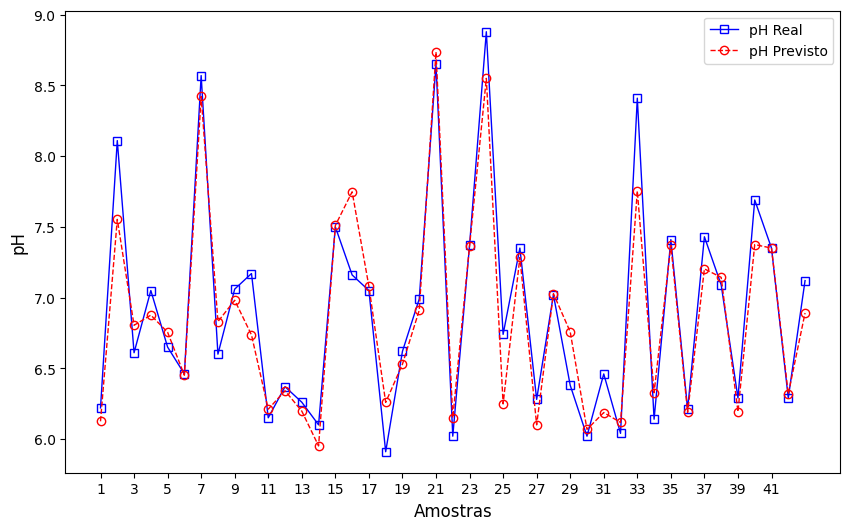

In [139]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

number_of_samples = range(1, len(X_test) + 1)
figure(figsize=(10,6))
plt.plot(number_of_samples, y_test,'b', marker = 's', markerfacecolor='none', linewidth = 1, label='pH Real')
plt.plot(number_of_samples, rf_predict, 'r', marker = 'o', markerfacecolor='none', linestyle = 'dashed', linewidth = 1, label='pH Previsto')
plt.xticks(np.arange(min(number_of_samples), max(number_of_samples), 2))
plt.xlabel('Amostras', fontsize= 12)
plt.ylabel('pH', fontsize= 12)

plt.legend()

plt.show()
